In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#Correlation
correlation = gold_data.corr()

<AxesSubplot:>

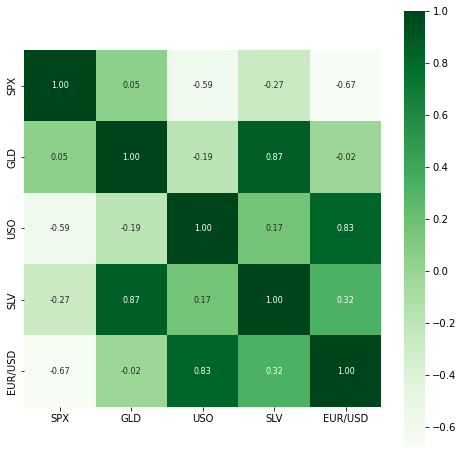

In [9]:
#Construct Heatmap
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [10]:
#Print salah satu korelasi
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

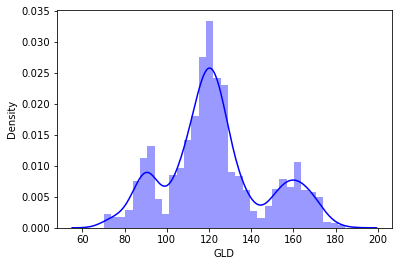

In [11]:
#cek distribusi GLD
sns.distplot(gold_data['GLD'],color='blue')

# Split data train dan data test

In [12]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [13]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [14]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# Model Random Forest

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [18]:
test_data_predict = regressor.predict(X_test)

In [19]:
test_data_predict

array([168.436899  ,  82.02149975, 116.15020011, 127.56010052,
       120.65600151, 154.92259779, 150.3561987 , 125.94750027,
       117.46089898, 126.06050028, 116.71940073, 171.22300096,
       141.59029866, 167.78039836, 114.94770031, 117.70100046,
       137.59750328, 169.90040134, 159.33070207, 156.77539965,
       155.13860011, 125.23520043, 176.52529946, 156.97470401,
       125.18650043,  93.90389978,  77.39010021, 120.33739988,
       119.06319956, 167.57439956,  88.22510051, 125.12700044,
        91.03730048, 117.76860014, 121.13579902, 135.94780145,
       115.73210111, 115.29390097, 148.52410006, 107.08050081,
       104.37890228,  87.13089784, 126.45950036, 118.08839969,
       153.89949887, 119.57480008, 108.4924    , 108.27639802,
        93.30650101, 127.17129765,  74.87300037, 113.63839933,
       121.14270017, 111.29199927, 119.00769905, 120.6576997 ,
       159.68580101, 166.77670122, 147.02829648,  85.87699848,
        94.03150044,  86.89129861,  90.52650006, 119.07

In [20]:
#R square
error_score = metrics.r2_score(Y_test,test_data_predict)
error_score

0.9892811612103677

# Membandingkan hasil prediksi dengan aktual

In [21]:
Y_test = list(Y_test)

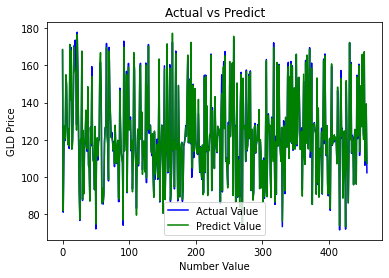

In [24]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_predict, color='green', label='Predict Value')
plt.title('Actual vs Predict')
plt.xlabel('Number Value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()